# Dependency Analysis for Regression

In [69]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Load Excel File
data = pd.read_excel('../data/final_dataset_1.xlsx')

# Set regression target
target = "No of Purchases"
target = "daily_coffee_cups"

# Drop target + ID
X = data.drop(columns=[target, "CustomerID"])
y = data[target]

# Split numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# ---------- MUTUAL INFORMATION ----------
mi = mutual_info_regression(X_encoded, y)
mi_series = pd.Series(mi, index=X_encoded.columns)

# ---------- PEARSON CORRELATION ----------
# correlation only works with numeric features, so we use encoded X
corr_series = X_encoded.corrwith(y)

# ---------- COMBINE INTO ONE TABLE ----------
result_table = pd.DataFrame({
    "MutualInfo": mi_series,
    "Correlation": corr_series
})

# sort by MI
result_table = result_table.sort_values(by="MutualInfo", ascending=False)

print(result_table)


                                  MutualInfo  Correlation
Impressions                         0.735534    -0.875754
Recommendation_Score                0.434653     0.764360
CSAT                                0.391697     0.729221
WebsiteVisits                       0.373049     0.733689
No of Purchases                     0.318106    -0.685471
AdViewFrequency                     0.241695     0.598255
LoyaltyPoints                       0.153355     0.507132
WishlistAddition                    0.099046     0.442402
AnnualIncome                        0.076231    -0.376493
Age                                 0.072533     0.383082
CartlistAddition                    0.027786    -0.228275
CES                                 0.024399    -0.244248
product_category_Clothing           0.023587    -0.005877
Clicks                              0.019917     0.193730
Sun_Sign_Cancer                     0.018382     0.008025
product_category_Groceries          0.016604     0.006465
CustomerLoyalt

In [70]:
# Zielvariable entfernen

# Mutual Information top 3
# LoyaltyPoints                       0.893691
# Age                                 0.772739
# CSAT                                0.475547

top3_features = result_table["MutualInfo"].sort_values(ascending=False).head(3).index.tolist()
top3_features_corr = result_table["Correlation"].sort_values(ascending=False).head(3).index.tolist()



#top3_features = mi_series.sort_values(ascending=False).head(3).index.tolist()
print(f"Top 3 Features by Mutual Information are: \n{'-'*50} \n{top3_features}")
print("\n")
print(f"Top 3 Features by Correlation are: \n{'-'*50} \n{top3_features_corr}")

Top 3 Features by Mutual Information are: 
-------------------------------------------------- 
['Impressions', 'Recommendation_Score', 'CSAT']


Top 3 Features by Correlation are: 
-------------------------------------------------- 
['Recommendation_Score', 'WebsiteVisits', 'CSAT']


In [71]:
# num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
# cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

top3_features = ['LoyaltyPoints', 'Age', 'CSAT']
top3_features = ['Impressions', 'Recommendation_Score', 'CSAT']

num_cols = data[top3_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = data[top3_features].select_dtypes(include=['object', 'category']).columns.tolist()



num_cols = [c for c in num_cols if c != 'No of Purchases']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

model = Pipeline(steps=[
    ('prep', preprocess),
    ('reg', LinearRegression())
])

X = data[num_cols + cat_cols]
y = data[target]

model.fit(X, y)
y_pred = model.predict(X)
resid = y - y_pred

print("R-squared:", model.score(X, y))


R-squared: 0.8065806291059682


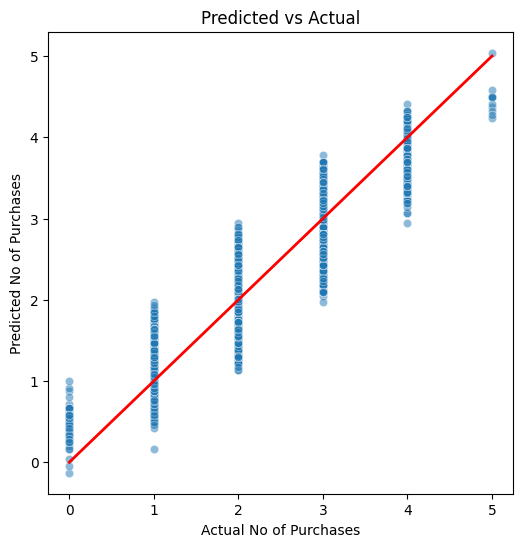

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y, y=y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel("Actual No of Purchases")
plt.ylabel("Predicted No of Purchases")
plt.title("Predicted vs Actual")
plt.show()


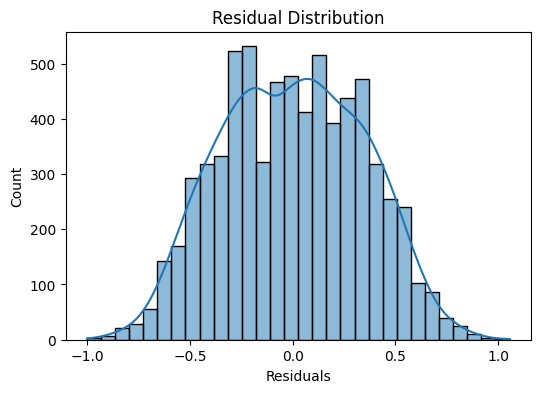

In [73]:
plt.figure(figsize=(6,4))
sns.histplot(resid, kde=True, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()


# Garbage Collection

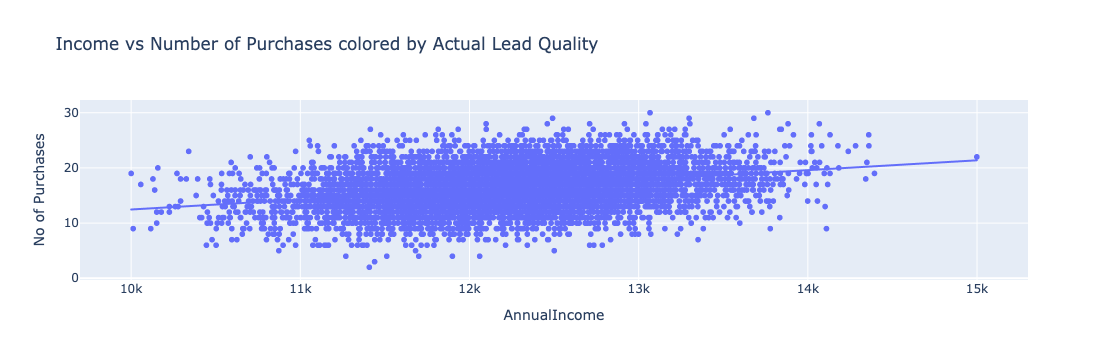

In [32]:
import plotly.express as px
fig = px.scatter(data, x='AnnualIncome', y='No of Purchases',
                 title='Income vs Number of Purchases colored by Actual Lead Quality', trendline='ols')
fig.show()

In [35]:
from sklearn.linear_model import LinearRegression

X_reg = data[['AnnualIncome']]
y_reg = data['No of Purchases']

lr = LinearRegression().fit(X_reg, y_reg)
y_pred = lr.predict(X_reg)
resid = y_reg - y_pred

print(f"Intercept: {lr.intercept_:.4f}")
print(f"Coefficient for AnnualIncome: {lr.coef_[0]:.4f}")
print(f"R-squared: {lr.score(X_reg, y_reg):.4f}")


Intercept: -5.3628
Coefficient for AnnualIncome: 0.0018
R-squared: 0.0957


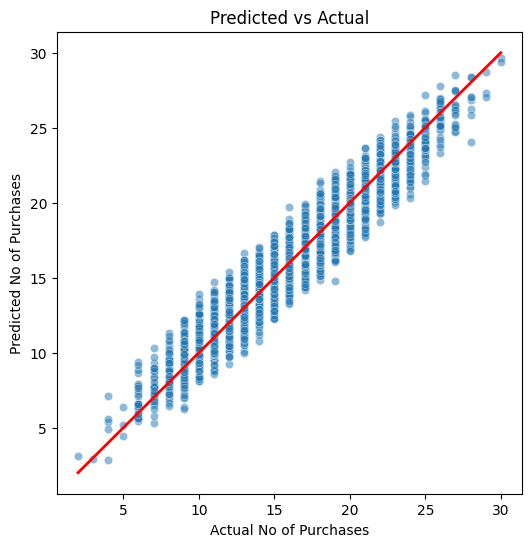

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y, y=y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel("Actual No of Purchases")
plt.ylabel("Predicted No of Purchases")
plt.title("Predicted vs Actual")
plt.show()


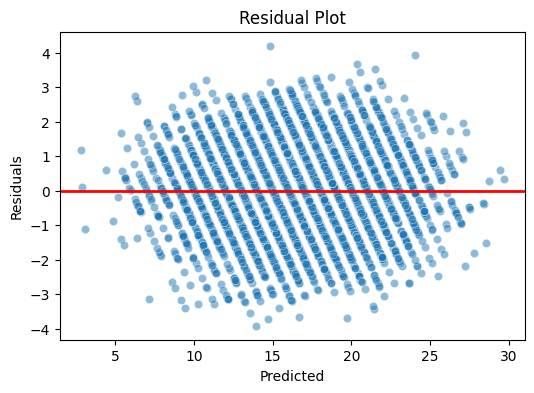

In [55]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=resid, alpha=0.5)
plt.axhline(0, color='red', linewidth=2)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


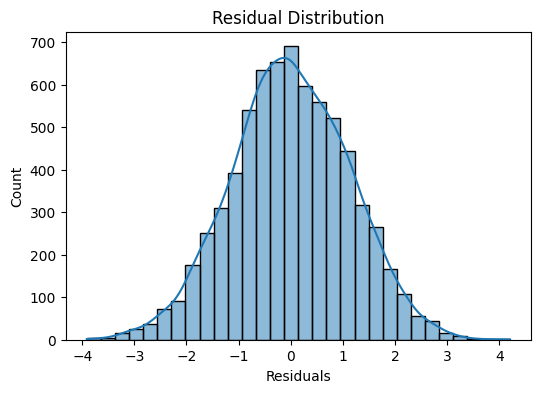

In [56]:
plt.figure(figsize=(6,4))
sns.histplot(resid, kde=True, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()


# Dependency Analysis for Classification

In [59]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Load Excel File
data = pd.read_excel('../data/final_dataset_1.xlsx')

print(data.head())

# Calculate Mutual Information
target = "CSAT"

X = data.drop(target, axis=1)
# drop CustomerID
X = X.drop("CustomerID", axis=1)

# Split numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# One-hot encode categorical features
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

y = data[target]
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("Mutual Information Scores:")
print(mi_series)


  CustomerID  Age  AnnualIncome  WebsiteVisits  Clicks  Conversions  \
0  CUST00001   49         11283             16      19            6   
1  CUST00002   57         12968             10      30            1   
2  CUST00003   44         11170             15      17            7   
3  CUST00004   58         12947             14      30            1   
4  CUST00005   35         12202             11      16            6   

   Impressions MarketingChannel  BounceRate  ScrollRate  ...  CSAT  has_pet  \
0           23  Email Marketing    0.256160    0.384589  ...     4        1   
1           31  Email Marketing    0.262553    0.314044  ...     3        0   
2           25      Display Ads    0.098418    0.997437  ...     4        0   
3           26  Email Marketing    0.434616    0.448675  ...     4        0   
4           31     Social Media    0.524063    0.860908  ...     2        0   

   Sun_Sign daily_coffee_cups product_category  subscription_type  \
0    Taurus                 3